In [1]:
import numpy as np
import matplotlib 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.metrics.regression import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import time
from sklearn import metrics
from scipy.interpolate import interp2d
import mplleaflet

In [ ]:
def calc_dist(lat1, lon1, lat2, lon2):
    radius = 6371 # km

    dlat = np.radians(lat2-lat1)
    dlon = np.radians(lon2-lon1)
    a = np.sin(dlat/2) * np.sin(dlat/2) + np.cos(np.radians(lat1)) \
        * np.cos(math.radians(lat2)) * np.sin(dlon/2) * np.sin(dlon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = radius * c
    return d

In [2]:
df_fine_complete = pd.read_csv('C:/Users/cc831/OneDrive - University Of Cambridge/Documents/admin/Insightapplication/Project/Arizona/completed_fine_df2.csv')
df_fine_complete.head()

,Latitude,Longitude,city distances,elevation,Num solarfarms,DNR
0,31.75,-113.750000,246.198592,50.972839,0,6.03
1,31.75,-113.634615,239.573742,99.589859,0,6.03
2,31.75,-113.519231,233.261529,617.773071,1,6.03
3,31.75,-113.403846,227.288010,233.403931,0,6.03
4,31.75,-113.288461,221.680572,156.278107,0,6.03


In [3]:
forest = RandomForestRegressor(oob_score=True)
X = df_fine_complete[['Longitude','Latitude', 'DNR', 'elevation', 'city distances']]
y = df_fine_complete[['Longitude','Latitude', 'Num solarfarms']] #taking a random sample of 100 locations to match size of DNR data

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25) 
# 75% training and 25% test

In [5]:
# Classifier on all training data!
forest.fit(X_train,y_train)

C:\Users\cc831\Anaconda2\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [6]:
y_pred = forest.predict(X_test)

In [7]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

1.1278044007077144

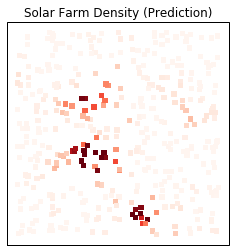

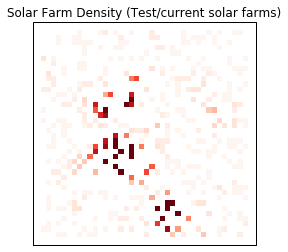

In [8]:
#Prediction
fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# plot_arizona(ax4)
ax4.scatter(y_pred[:,0], y_pred[:,1], c=y_pred[:,2], alpha=1, marker='s', s=27,
           cmap='Reds', edgecolor='None')
ax4.set_title('Solar Farm Density (Prediction)')

#Test
fig5 = plt.figure()
ax5 = fig5.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# plot_arizona(ax4)
ax5.scatter(y_test['Longitude'], y_test['Latitude'], c=y_test['Num solarfarms'], alpha=1, marker='s', s=27,
           cmap='Reds', edgecolor='None')
ax5.set_title('Solar Farm Density (Test/current solar farms)')